In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1단계 import package
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
import datetime as dt
import scipy
import missingno as msno 
plt.style.use('seaborn')

train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/sampleSubmission.csv')

In [ ]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

데이터 탐색
- datetime - hourly date + timestamp  

- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
-workingday - whether the day is neither a weekend nor holiday
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds >> 카테고리형
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals << target

#데이터 탐색

In [ ]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [ ]:
submission.head()
# count는 train에만 있음 count를 예측해야함

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
#datetime 컬럼 문자열 datetime으로 변경해야함...
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
######### train data 년,월,일,시간,요일 추출 ######### 
train['year']=train['datetime'].dt.year # 년도 추출 
train['month']=train['datetime'].dt.month # 월도 추출 
train['day']=train['datetime'].dt.day # 일 추출 
train['hour']=train['datetime'].dt.hour # 시 추출 
train['dayofweek']=train['datetime'].dt.dayofweek #요일 추출 , 월요일:0, 일요일:6


######### test data 년,월,일,시간,요일 추출 ######### 
test['year']=test['datetime'].dt.year # 년도 추출 
test['month']=test['datetime'].dt.month # 월도 추출 
test['day']=test['datetime'].dt.day # 일 추출 
test['hour']=test['datetime'].dt.hour # 시 추출 
test['dayofweek']=test['datetime'].dt.dayofweek #요일 추출 , 월요일:0, 일요일:6

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


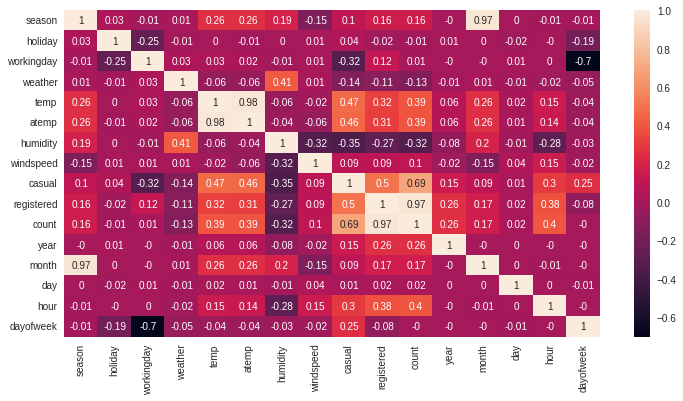

In [ ]:
#상관계수 확인

plt.figure(figsize = (12,6))
corr_mat = train.corr().round(2)
sns.heatmap(data = corr_mat, annot = True)

#atemp 버리기 -> temp와 corelationshop 0.98정도의 상관관계 
#온도가 아니라 체감온도 버리는 이유: 체감온도는 날씨계산식으로 추출되기 때문에 온도가 정석의 기준점.

##데이터 전처리

In [ ]:
#season이 월별로 123 / 456 /789 /101112 로 나눠짐...
print(train[train['season'] == 1].month.unique())
print(train[train['season'] == 2].month.unique())
print(train[train['season'] == 3].month.unique())
print(train[train['season'] == 4].month.unique())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


In [ ]:
# train data 계절 분류

def change_season(month):
  if month in [12,1,2]:
    return 4
  elif month in [3,4,5]:
    return 1
  elif month in [6,7,8]:
    return 2
  else:
    return 3
train['season'] = train.month.apply(change_season)
test['season'] = test.month.apply(change_season)

# 데이터 선택하기

## windspeed 조정(0값)
* iqr 방식 사용

In [ ]:
q1 = train["windspeed"].quantile(0.25)
q3 = train["windspeed"].quantile(0.75)
iqr = q3 -q1
n = (train.windspeed < q1 - (1.5 * iqr)) | (train.windspeed > q3 + (1.5 * iqr))
train[n]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
175,2011-01-08 14:00:00,4,0,0,1,8.20,8.335,32,32.9975,12,83,95,2011,1,8,14,5
178,2011-01-08 17:00:00,4,0,0,1,6.56,6.060,37,36.9974,5,64,69,2011,1,8,17,5
194,2011-01-09 09:00:00,4,0,0,1,4.92,3.790,46,35.0008,0,19,19,2011,1,9,9,6
196,2011-01-09 11:00:00,4,0,0,1,6.56,6.060,40,35.0008,2,47,49,2011,1,9,11,6
265,2011-01-12 12:00:00,4,0,1,1,8.20,7.575,47,39.0007,3,52,55,2011,1,12,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10013,2012-11-02 14:00:00,3,0,1,2,16.40,20.455,40,32.9975,63,199,262,2012,11,2,14,4
10154,2012-11-08 12:00:00,3,0,1,1,16.40,20.455,24,32.9975,33,202,235,2012,11,8,12,3
10263,2012-11-13 01:00:00,3,0,1,3,18.04,21.970,88,43.0006,0,5,5,2012,11,13,1,1
10540,2012-12-05 14:00:00,4,0,1,1,19.68,23.485,33,32.9975,39,179,218,2012,12,5,14,2


## count 왜도/첨도 부분 조정

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.242066
Kurtosis: 1.300093


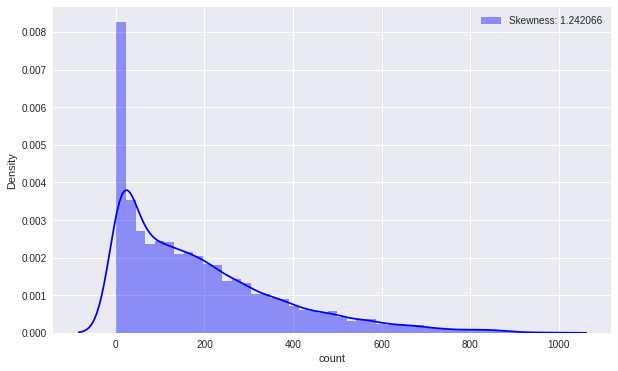

In [ ]:
#count의 왜도와 첨도 확인
f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(train["count"], color = "b", label="Skewness: {:2f}".format(train["count"].skew()), ax=ax) 
g = g.legend(loc = "best") 

print("Skewness: %f" % train["count"].skew()) 
print("Kurtosis: %f" % train["count"].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness(왜도): -0.971228
kurtosis(첨도): 0.246622


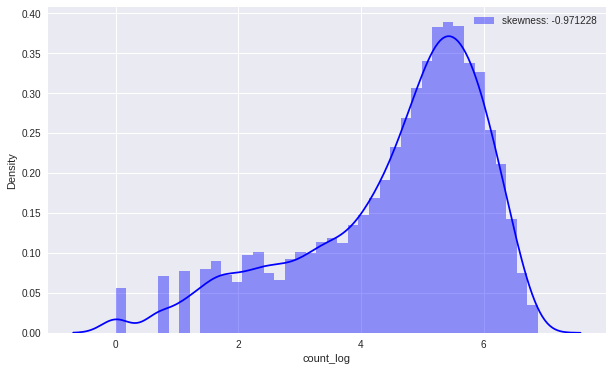

In [ ]:
#count log_scalling 으로 정규화
#lambda 를 사용해서 로그를 취해준 count값을 count_log 컬럼으로 생성
train['count_log'] = train['count'].map(lambda i:np.log(i) if i > 0 else 0)

fig, ax = plt.subplots(1,1, figsize = (10, 6))
graph = sns.distplot(train['count_log']
			, color = 'b'
            , label = 'skewness: {:2f}'.format(train['count_log'].skew())
            , ax = ax)
graph = graph.legend(loc = 'best')

print("skewness(왜도): %f" %train['count_log'].skew())
print("kurtosis(첨도): %f" %train['count_log'].kurt())

#필요없는 count값 없애주기
train.drop('count', axis = 1, inplace = True) # 나중에 변환 필요

# 데이터 추출 작업 및 모델 돌리기

In [ ]:
## 데이터 다시 가져오기 
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
sample = pd.read_csv('/content/drive/MyDrive/sampleSubmission.csv')

## 이상치 제거

In [ ]:
q1 = train["windspeed"].quantile(0.25)
q3 = train["windspeed"].quantile(0.75)
iqr = q3 -q1
n = (train.windspeed < q1 - (1.5 * iqr)) | (train.windspeed > q3 + (1.5 * iqr))
train[n]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
175,2011-01-08 14:00:00,1,0,0,1,8.20,8.335,32,32.9975,12,83,95
178,2011-01-08 17:00:00,1,0,0,1,6.56,6.060,37,36.9974,5,64,69
194,2011-01-09 09:00:00,1,0,0,1,4.92,3.790,46,35.0008,0,19,19
196,2011-01-09 11:00:00,1,0,0,1,6.56,6.060,40,35.0008,2,47,49
265,2011-01-12 12:00:00,1,0,1,1,8.20,7.575,47,39.0007,3,52,55
...,...,...,...,...,...,...,...,...,...,...,...,...
10013,2012-11-02 14:00:00,4,0,1,2,16.40,20.455,40,32.9975,63,199,262
10154,2012-11-08 12:00:00,4,0,1,1,16.40,20.455,24,32.9975,33,202,235
10263,2012-11-13 01:00:00,4,0,1,3,18.04,21.970,88,43.0006,0,5,5
10540,2012-12-05 14:00:00,4,0,1,1,19.68,23.485,33,32.9975,39,179,218


## 데이터 합치기

훈련 데이터와 테스트 데이터에 같은 피쳐엔지니어링을 적용하기 위해 두 데이터를 하나로 합침.

In [ ]:
all_data = pd.concat([train, test], ignore_index=True)
all_data
# train shape , test shape = ((10886, 12), (6493, 9)) => 10886+6493 = 17379

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


## 파생변수(피처) 추가

In [ ]:
all_data['datetime'] = pd.to_datetime(all_data['datetime'])

from datetime import datetime # 분, 초 피처는 생성 하지 않음

all_data['year']=all_data['datetime'].dt.year # 년도 추출 
all_data['month']=all_data['datetime'].dt.month # 월도 추출 
all_data['day']=all_data['datetime'].dt.day # 일 추출 
all_data['hour']=all_data['datetime'].dt.hour # 시 추출 

## 필요 없는 피처 제거

In [ ]:
drop_features = ['casual', 'registered', 'datetime', 'atemp', 'holiday']

all_data = all_data.drop(drop_features, axis=1)

## 데이터 나누기

In [ ]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])] # count값이 있으면 훈련 데이터
X_test = all_data[pd.isnull(all_data['count'])]   # count값이 없으면 테스트 데이터

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1) # count값은 target값이기 때문에 제거
X_test = X_test.drop(['count'], axis=1)   # count값은 target값이기 때문에 제거

y = train['count'] # 타깃값 따로 저장

In [ ]:
X_train.head()

,season,workingday,weather,temp,humidity,windspeed,year,month,day,hour
0,1,0,1,9.84,81,0.0,2011,1,1,0
1,1,0,1,9.02,80,0.0,2011,1,1,1
2,1,0,1,9.02,80,0.0,2011,1,1,2
3,1,0,1,9.84,75,0.0,2011,1,1,3
4,1,0,1,9.84,75,0.0,2011,1,1,4


In [ ]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

# 평가지표 계산함수 작성

In [ ]:
### RMSLE를 이용해야 하기 때문에 계산함수 작성 ###

import numpy as np

def rmsle(y_true, y_pred, convertExp=True): # 추가된 부분으로 돌림
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

 ### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [ ]:
log_y = np.log(y)  # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # linear regression 모델에 훈련 진행 

LinearRegression()

## 모델 성능 검증

In [ ]:
preds = linear_reg_model.predict(X_train) # X_train값을 기반으로 타깃값 예측 진행
print (f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형회귀의 RMSLE 값 : 1.0197


## 예측 및 결과 제출

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

### 그리드서치 객체 생성

In [ ]:
# 하이퍼 파라미터 값 목록
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
# alpha 값이 커질 수록 규제 강도가 세지기 때문에 적절한 규제를 사용하면 과대 적합 문제 개선

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,   # 릿지 모델(estimator: 분류 및 회귀 모델)
                                      param_grid=ridge_params, # 값 목록
                                      scoring=rmsle_scorer,    # 평가지표
                                      cv=5)                    # 교차검증 분할 수

### 그리드서치 수행

In [ ]:
log_y = np.log(y) # 타깃값 로그변환
gridsearch_ridge_model.fit(X_train, log_y) # 훈련(그리드서치)
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.1, 'max_iter': 3000}


### 성능 검증

In [ ]:
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train) 

# 평가
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}') 

릿지 회귀 RMSLE 값 : 1.0197


# 라쏘 회귀 모델

* L1 규제를 적용한 선형 회귀 모델
* 릿지 회귀 모델과 마찬가지로 성능이 별로 좋지 못해서 잘 안씀


In [ ]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.005, 'max_iter': 3000}


In [ ]:
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0198


# 랜덤 포레스트 회귀 모델

: 훈련 데이터를 랜덤하게 샘플링한 모델 n개를 각각 훈련하여 결과를 평균하는 방법

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
# 그리드서치 객체 생성
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


In [ ]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1187


4개의 모델 중 가장 성능이 좋은 모델은 랜덤 포레스트. -> 제출 진행

# 예측 및 결과 제출

성능 측정을 훈련 데이터로 했기 때문에 테스트 데이터에서도 성능이 좋다고 보장할 수는 없음. 이번 경진대회의 경우에는 훈련 데이터와 테스트 데이터의 분포가 비슷하여 상대적으로 과대적합 문제가 적게 발생하기 때문에 훈련 데이터에서 성능이 좋다면 테스트 데이터에서도 성능이 좋을 가능성이 큼.

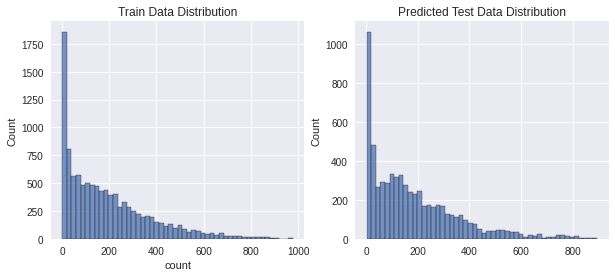

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [ ]:
### sample['count'] = np.exp(randomforest_preds) # 지수변환
### sample.to_csv('submission.csv', index=False)

# ★★★★★★★★ 우리가 만든 모델로 돌리기

In [ ]:
def RMSLE(y, pred): # 발표 때 사용
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [ ]:
 #선형회귀 모델
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=DeprecationWarning)

# 선형회귀 모델을 초기화
linear_model = LinearRegression()

# 모델 학습
y_log = np.log1p(y)
linear_model.fit(X_train, y_log)

# 예측하고 정확도를 평가한다.
preds = linear_model.predict(X_train)
print("RMSLE Value for linear regression: ",
     RMSLE(np.exp(y_log), np.exp(preds)))

RMSLE Value for linear regression:  0.9795204544071914


In [ ]:
#릿지 모델
ridge_model = Ridge()
ridge_params_ = {'max_iter':[3000],
                 'alpha':[0.01, 0.1, 1, 2, 3, 4, 10,
                          30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_model = GridSearchCV(ridge_model,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_log = np.log1p(y)
grid_ridge_model.fit(X_train, y_log)
preds = grid_ridge_model.predict(X_train)
print (grid_ridge_model.best_params_)
print ("RMSLE Value For Ridge Regression: ", 
       RMSLE(np.exp(y_log),np.exp(preds)))

{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9795204524245124


In [ ]:
lasso_model = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = {'max_iter':[3000], 'alpha':alpha}

grid_lasso_model = GridSearchCV(lasso_model,
                          lasso_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_log = np.log1p(y)
grid_lasso_model.fit(X_train, y_log)
preds = grid_lasso_model.predict(X_train)
print (grid_lasso_model.best_params_)
print ("RMSLE Value For Lasso Regression: ", 
       RMSLE(np.exp(y_log),np.exp(preds)))

{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9795260039557026


In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomforest_model = RandomForestRegressor(n_estimators=150)

y_log = np.log1p(y)
randomforest_model.fit(X_train, y_log)

preds = randomforest_model.predict(X_train)
score_rf = rmsle(np.exp(y_log),np.exp(preds))
print ("RMSLE Value For Random Forest: ", score_rf)
predsTest = randomforest_model.predict(X_test)

RMSLE Value For Random Forest:  0.11268576142379255


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

y_log = np.log1p(y)
gbm.fit(X_train, y_log)

preds = gbm.predict(X_train)
score = RMSLE(np.exp(y_log),np.exp(preds))
print ("RMSLE Value For Gradient Boost: ", score)

RMSLE Value For Gradient Boost:  0.21545031382230348
